# Analysis
Now let's delve deeper into the analysis!

## Load DataFrames

In [1]:
# import things
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# reading in files
fb_congress_df = pd.read_pickle("pickle/fb_congress_df_part1.pkl")
fb_congress_df2 = pd.read_pickle("pickle/fb_congress_df_part2.pkl")

# merging them
fb_congress_df = fb_congress_df.append(fb_congress_df2)

In [3]:
# read in fb wiki
fb_wiki_df = pd.read_pickle("pickle/fb_wiki_df.pkl")

In [4]:
# read in fitocracy
fitocracy_df = pd.read_pickle("pickle/fitocracy_df.pkl")

In [5]:
# read in reddit
reddit_df = pd.read_pickle("pickle/reddit_df.pkl")

In [6]:
# read in ted
ted_responses_df = pd.read_pickle("pickle/ted_responses_df.pkl")

## Conduct basic analysis
Some of this information will be repetition from previous files, but I want to have it all in one place here.

### Analysis of Facebook Congress

In [7]:
fb_congress_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,video,57265377,Roger Williams,Congress_Republican,M,Jerry,"Yesterday, my colleagues and I voted to protec...",Protecting birth is not the same as protecting...
1,0,video,57265377,Roger Williams,Congress_Republican,M,Andrea,"Yesterday, my colleagues and I voted to protec...",You need to protect children and leave my body...
2,0,video,57265377,Roger Williams,Congress_Republican,M,Sherry,"Yesterday, my colleagues and I voted to protec...",Thank you
3,0,video,57265377,Roger Williams,Congress_Republican,M,Bob,"Yesterday, my colleagues and I voted to protec...",Thank you Roger
4,0,video,57265377,Roger Williams,Congress_Republican,M,Joy,"Yesterday, my colleagues and I voted to protec...",Unwanted pregnancy is a sad and unfortunate si...


In [8]:
unique_posts = fb_congress_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

link      210499
photo     199123
status     87921
video      46842
event       3417
music        278
note         261
Name: post_type, dtype: int64

In [9]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

Congress_Republican     239909
Congress_Democratic     158237
                        149304
Congress_Independent       891
Name: op_category, dtype: int64

Note: the ones with no category are the ones with no response corresponding to that post.

In [10]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

M    413011
W    135330
Name: op_gender, dtype: int64

In [11]:
# average num responses for everyone
fb_congress_df.post_id.value_counts().mean()

25.560392164729613

In [12]:
# average number of responses per gender

print('average responses when poster is male:', fb_congress_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_congress_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 25.473808203655594
average responses when poster is female: 25.824636074780166


### Analysis of Facebook Wiki

In [13]:
fb_wiki_df.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
0,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Michelle,Tornado watch in effect tonight. Be safe. Plea...,Is this watch going to make it to LaPorte county?
1,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,Anything for Wilmington area
2,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Darlene,Tornado watch in effect tonight. Be safe. Plea...,"Thanks, please keep us posted."
3,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cheryl,Tornado watch in effect tonight. Be safe. Plea...,Thanks Byron
4,0,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Melissa,Tornado watch in effect tonight. Be safe. Plea...,[[STICKER]]


In [14]:
unique_posts = fb_wiki_df.drop_duplicates('post_id')

# different post types, make sure unique for post id
unique_posts.post_type.value_counts()

photo     61411
link      37609
status    33495
video     16026
event       859
note         32
music        16
Name: post_type, dtype: int64

In [15]:
# different op categories, make sure unique for post id
unique_posts.op_category.value_counts()

                                                                   31637
Wikipedia_American_television_actresses                            22822
Wikipedia_American_television_news_anchors                         17925
Wikipedia_American_television_talk_show_hosts                      16607
Wikipedia_American_female_tennis_players                           14855
Wikipedia_American_film_actresses                                  14579
Wikipedia_American_male_film_actors                                12304
Wikipedia_American_television_journalists                          10285
Wikipedia_American_male_television_actors                           3330
Wikipedia_Women_economists                                          2945
Wikipedia_American_male_tennis_players                               957
Wikipedia_21st-century_American_novelists                            792
Wikipedia_Political_analysts                                         338
Wikipedia_Olympic_track_and_field_athletes_of_the_U

In [16]:
# different op genders, make sure unique for post id
unique_posts.op_gender.value_counts()

W    99692
M    49756
Name: op_gender, dtype: int64

In [17]:
# average num responses for everyone
fb_wiki_df.post_id.value_counts().mean()

71.5910350088325

In [18]:
# average number of responses per gender

print('average responses when poster is male:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['M'].mean())
print('average responses when poster is female:', fb_wiki_df.groupby('op_gender').post_id.value_counts()['W'].mean())

average responses when poster is male: 71.25723530830453
average responses when poster is female: 71.75763351121454


### Analysis of Fitocracy

In [19]:
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =]
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are."
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s..."


In [20]:
# make sure post id is unique again
print(fitocracy_df.post_id.nunique())
print(len(fitocracy_df.post_id))

318535
318535


In [21]:
# different op genders
fitocracy_df.op_gender.value_counts()

M    173738
W    144797
Name: op_gender, dtype: int64

In [22]:
# different responder genders
fitocracy_df.responder_gender.value_counts()

W    163315
M    155220
Name: responder_gender, dtype: int64

In [23]:
# can't do average number responses per gender - there is only one response per post

# instead, look at how many males respond to males vs. females and how many females respond to males vs. females
fitocracy_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M          W                   94375
           M                   79363
W          M                   75857
           W                   68940
Name: responder_gender, dtype: int64

### Analysis of Reddit

In [24]:
reddit_df.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
0,0,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,slayer task perhaps?,or low level. I mean hes wearing black armour ...
1,1,2007scape,Kastoli,M,False,Thunda_Storm,,unknown_gender,"Black DHide legs, possibly an initiate pure?",So... Low level
2,2,2007scape,DCBizzle,M,False,minixmatt,,unknown_gender,Whats a tonk? lol,"<link> TONK, TONK"
3,3,2007scape,ordona,M,False,Namiweso,,unknown_gender,Do the Stronghold of Security for a free 10k t...,Thanks I forgot about that place! :)
4,4,2007scape,SlayerMaster,M,False,Quantization,,unknown_gender,I cant tell if this guy just doesnt speak Engl...,Or hes just trolling.


In [25]:
# make sure post id is unique again
print(reddit_df.post_id.nunique())
print(len(reddit_df.post_id))

1453512
1453512


In [26]:
# different subreddits
reddit_df.subreddit.value_counts()

AskReddit               344400
AskMen                  133920
politics                 46727
funny                    44761
pics                     42920
relationships            34809
AdviceAnimals            33965
worldnews                33571
todayilearned            32652
nba                      32242
gaming                   27855
news                     27225
nfl                      27194
videos                   26940
WTF                      26682
soccer                   22315
leagueoflegends          22151
CasualConversation       21517
movies                   20567
OkCupid                  18239
CFB                      16025
anime                    15254
europe                   15233
hockey                   14949
Fitness                  14909
teenagers                12809
pcmasterrace             11841
explainlikeimfive        11270
SquaredCircle            11249
technology               11244
                         ...  
xboxone                   2932
heroesof

In [27]:
# different op genders
reddit_df.op_gender.value_counts()

M    1148591
W     304921
Name: op_gender, dtype: int64

In [28]:
# different responder genders
reddit_df.responder_gender.value_counts()
# blank is unknown

     1320290
M     102530
W      30692
Name: responder_gender, dtype: int64

In [29]:
# look at how many males respond to males vs. females and how many females respond to males vs. females
reddit_df.groupby('op_gender').responder_gender.value_counts()

op_gender  responder_gender
M                              1045003
           M                     80705
           W                     22883
W                               275287
           M                     21825
           W                      7809
Name: responder_gender, dtype: int64

Let's look at male vs. female posters by subreddit and see if we can find any patterns. It was my assumption that maybe there was so much more male posters and responders was because of the prominent AskMen subreddit.

In [30]:
# copying in from another file, but I thought it was important to look at again
subgroups = reddit_df.groupby('subreddit').op_gender.value_counts()
subgroups_df = subgroups.unstack()
subgroups_df.head()

op_gender,M,W
subreddit,,
2007scape,886.0,42.0
AdviceAnimals,25525.0,8440.0
Amd,860.0,19.0
AskMen,110542.0,23378.0
AskOuija,98.0,19.0


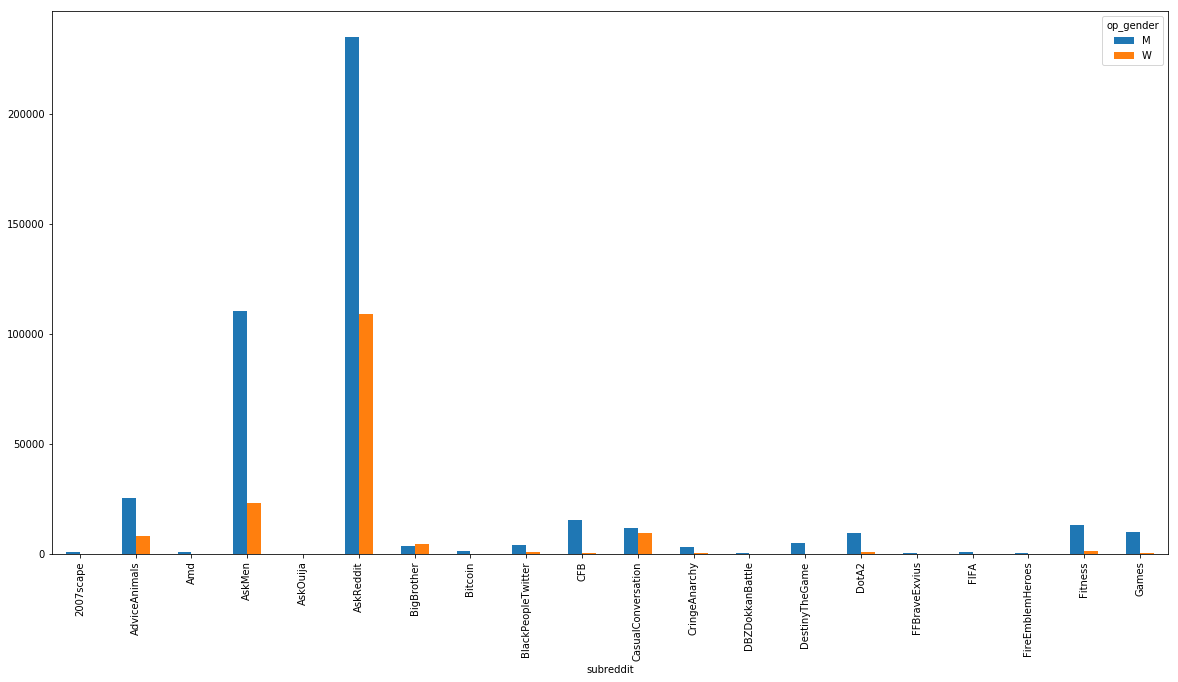

In [31]:
# graph the first 20 subreddits to get some idea
subgroups_df[:20].plot(kind='bar', figsize=(20,10))
plt.show()

So just looking at a flash of the data, 'AskMen' doesn't seem to stand out as a much higher male:female ratio. It seems like most have more male. Maybe Reddit is just a male-dominated site.

Are there any groups where there are more women? From the graph, it looks like the subreddit "BigBrother" has more female posters. Let's see what else...

In [32]:
subgroups_df[subgroups_df.W > subgroups_df.M]

op_gender,M,W
subreddit,,
BigBrother,3564.0,4647.0
aww,4400.0,4597.0
counting,267.0,531.0
relationships,10951.0,23858.0
rupaulsdragrace,153.0,728.0


So with all these subreddits - there are only 5 that have more female than male posters!

### Analysis of TED

In [33]:
ted_responses_df.head()

,post_id,op_id,op_gender,responder_id,response_text
0,0,Aimee Mullins,W,Laura,"She seems like a truly amazing person, regardl..."
1,1,Aimee Mullins,W,Ellen,"Aimee's true ""disability"" is when people treat..."
2,2,Aimee Mullins,W,Tanya,I love that she took away some of the mystery ...
3,3,Aimee Mullins,W,Salim,VERY inspiring indeed! I love these TED antiqu...
4,4,Aimee Mullins,W,Kiruba,We take running so much for granted that most ...


In [34]:
# different op genders
ted_responses_df.op_gender.value_counts()

M    144336
W     46011
Name: op_gender, dtype: int64

Not much else to analyze here...

## Conduct linguistic analysis
Next, we'll look at the actual text. Let's start by conducting some simple linguistic analysis, like token count, sentence length, and TTR.

### Facebook Congress linguistic analysis

In [35]:
# making a smaller sample to do analysis on since it's way too big
# how big again?
fb_congress_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14015811 entries, 0 to 14015810
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 1.0+ GB


In [36]:
fb_congress_df.op_category.value_counts()

Congress_Republican     8886650
Congress_Democratic     4786769
Congress_Independent     193088
                         149304
Name: op_category, dtype: int64

In [37]:
# so there are 14M entries. That's a TON to tokenize. Let's take a sample of 50,000
# should I do a stratified sample?
fb_congress_sample = fb_congress_df.sample(50000)
fb_congress_sample.sort_index(inplace=True)
fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text
276,8,status,57265377,Roger Williams,Congress_Republican,M,Michael,President Trump has just nominated judge Neil ...,What happened with upholding the will of the l...
990,26,video,57265377,Roger Williams,Congress_Republican,M,Mireille,In 15 days we will restore conservative values...,Can hardly wait for this guy to leave.
1396,36,link,57265377,Roger Williams,Congress_Republican,M,Joel,"In Texas, we take care of our veterans - and t...",Chairmaine Mrs. Obama and Mrs. Biden's organiz...
1536,42,photo,57265377,Roger Williams,Congress_Republican,M,Eddie,These are my foremost conservative principles....,End the murder of babies in the womb.
1592,45,photo,57265377,Roger Williams,Congress_Republican,M,Cleon,It is a great privilege to continue serving th...,"Congratulations, Roger."


In [38]:
# make sure we still have all post types, op categories, and op genders
print(fb_congress_sample.post_type.value_counts())
print(fb_congress_sample.op_category.value_counts())
print(fb_congress_sample.op_gender.value_counts())

link      16950
photo     14659
status     9599
video      8700
event        78
note         12
music         2
Name: post_type, dtype: int64
Congress_Republican     31927
Congress_Democratic     16821
Congress_Independent      727
                          525
Name: op_category, dtype: int64
M    37513
W    12487
Name: op_gender, dtype: int64


In [39]:
# use nltk's tokenizer
import nltk

fb_congress_sample['post_tokens'] = fb_congress_sample.post_text.map(nltk.word_tokenize)
fb_congress_sample['response_tokens'] = fb_congress_sample.response_text.map(nltk.word_tokenize)

In [40]:
# find text length
fb_congress_sample['post_length'] = fb_congress_sample.post_tokens.map(len)
fb_congress_sample['response_length'] = fb_congress_sample.response_tokens.map(len)

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
276,8,status,57265377,Roger Williams,Congress_Republican,M,Michael,President Trump has just nominated judge Neil ...,What happened with upholding the will of the l...,"[President, Trump, has, just, nominated, judge...","[What, happened, with, upholding, the, will, o...",68,13
990,26,video,57265377,Roger Williams,Congress_Republican,M,Mireille,In 15 days we will restore conservative values...,Can hardly wait for this guy to leave.,"[In, 15, days, we, will, restore, conservative...","[Can, hardly, wait, for, this, guy, to, leave, .]",17,9
1396,36,link,57265377,Roger Williams,Congress_Republican,M,Joel,"In Texas, we take care of our veterans - and t...",Chairmaine Mrs. Obama and Mrs. Biden's organiz...,"[In, Texas, ,, we, take, care, of, our, vetera...","[Chairmaine, Mrs., Obama, and, Mrs., Biden, 's...",21,38
1536,42,photo,57265377,Roger Williams,Congress_Republican,M,Eddie,These are my foremost conservative principles....,End the murder of babies in the womb.,"[These, are, my, foremost, conservative, princ...","[End, the, murder, of, babies, in, the, womb, .]",11,9
1592,45,photo,57265377,Roger Williams,Congress_Republican,M,Cleon,It is a great privilege to continue serving th...,"Congratulations, Roger.","[It, is, a, great, privilege, to, continue, se...","[Congratulations, ,, Roger, .]",30,4


Let's look at length in a boxplot grouping by gender!

average post length when poster is male: 59.2830485431717
average post length when poster is female: 77.68262993513254


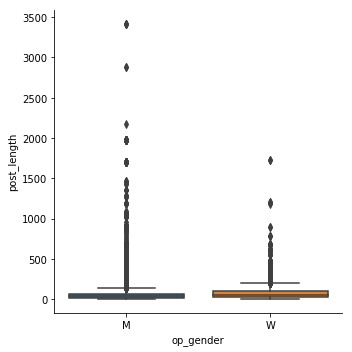

In [41]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_congress_sample)
print('average post length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].post_length.mean())

So female posters seem to typically have longer posts than male posters! Let's look at some more details:

In [42]:
fb_congress_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                        \
                count       mean         std  min   25%   50%   75%     max   
op_gender                                                                     
M             37513.0  59.283049  107.559985  0.0  19.0  35.0  67.0  3419.0   
W             12487.0  77.682630   83.485788  0.0  27.0  53.0  95.0  1731.0   

          response_length                                                      
                    count       mean        std  min  25%   50%   75%     max  
op_gender                                                                      
M                 37513.0  31.546877  66.040687  0.0  7.0  15.0  33.0  1546.0  
W                 12487.0  31.740210  69.717870  0.0  7.0  15.0  33.0  1586.0

average response length when poster is male: 31.54687708261136
average response length when poster is female: 31.74020981821094


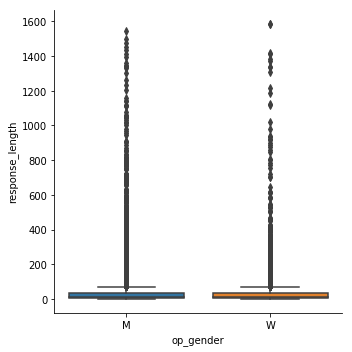

In [43]:
# plot the response length too
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_congress_sample[fb_congress_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_congress_sample[fb_congress_sample.op_gender == 'W'].response_length.mean())

This time, op_gender doesn't make much of a difference in the length of the responses.

In [44]:
# getting sentence lengths
post_sent_count = fb_congress_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_congress_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [45]:
# find average sentence length
post_avg_sent_length = fb_congress_sample.post_length / post_sent_count
response_avg_sent_length = fb_congress_sample.response_length / response_sent_count

In [46]:
# make new columns
fb_congress_sample['post_avg_slen'] = post_avg_sent_length
fb_congress_sample['response_avg_slen'] = response_avg_sent_length

fb_congress_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
276,8,status,57265377,Roger Williams,Congress_Republican,M,Michael,President Trump has just nominated judge Neil ...,What happened with upholding the will of the l...,"[President, Trump, has, just, nominated, judge...","[What, happened, with, upholding, the, will, o...",68,13,22.666667,13.0
990,26,video,57265377,Roger Williams,Congress_Republican,M,Mireille,In 15 days we will restore conservative values...,Can hardly wait for this guy to leave.,"[In, 15, days, we, will, restore, conservative...","[Can, hardly, wait, for, this, guy, to, leave, .]",17,9,8.500000,9.0
1396,36,link,57265377,Roger Williams,Congress_Republican,M,Joel,"In Texas, we take care of our veterans - and t...",Chairmaine Mrs. Obama and Mrs. Biden's organiz...,"[In, Texas, ,, we, take, care, of, our, vetera...","[Chairmaine, Mrs., Obama, and, Mrs., Biden, 's...",21,38,10.500000,38.0
1536,42,photo,57265377,Roger Williams,Congress_Republican,M,Eddie,These are my foremost conservative principles....,End the murder of babies in the womb.,"[These, are, my, foremost, conservative, princ...","[End, the, murder, of, babies, in, the, womb, .]",11,9,5.500000,9.0
1592,45,photo,57265377,Roger Williams,Congress_Republican,M,Cleon,It is a great privilege to continue serving th...,"Congratulations, Roger.","[It, is, a, great, privilege, to, continue, se...","[Congratulations, ,, Roger, .]",30,4,10.000000,4.0


In [47]:
# does gender of poster have an impact on sentence length?
fb_congress_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                        \
                  count       mean       std  min        25%   50%        75%   
op_gender                                                                       
M               35452.0  17.923509  8.907070  1.0  11.666667  17.0  22.888889   
W               12119.0  19.393025  8.370994  1.0  13.500000  18.5  24.250000   

                 response_avg_slen                                             \
             max             count       mean        std  min  25%  50%   75%   
op_gender                                                                       
M          191.0           37093.0  11.670740  12.975732  1.0  5.0  9.5  15.0   
W           92.0           12359.0  11.619882  12.644553  1.0  5.0  9.0  15.0   

                   
              max  
op_gender          
M          1409.0  
W           849.0

It seems like female posters may use slightly longer sentences than male posters. Again, the length of the responses doesn't seem to change dependent on the gender of the poster.

Should we add a TTR column?

In [48]:
# define TTR
def get_ttr(tokens):
    lower = [w.lower() for w in tokens]
    if len(lower) == 0:   # sometimes there was no text
        return None
    else:
        return len(set(lower))/len(lower)

In [49]:
# add to df
#fb_congress_sample['post_TTR'] = fb_congress_sample.post_tokens.map(get_ttr)
#fb_congress_sample['response_TTR'] = fb_congress_sample.response_tokens.map(get_ttr)
#fb_congress_sample.head()

Commented the above out because: is TTR even useful here? Sometimes the responses are so short that they have a TTR of 1. This doesn't help us.

It doesn't seem to make sense to calculate TTR at all since online posts are pretty short to begin with. TTR isn't very meaningful when there aren't very many words to even look at.

How about average google k-band?

In [50]:
# thanks Na-Rae for this code!

# reading file and setting up
# credit of the Google 1T English unigram frequency list goes to Peter Norbig's site: http://norvig.com/ngrams/
# these files can be used under the MIT license
google_1gram_lines = open('count_1w.txt').readlines()
google_1gram_tup = [tuple(line.split()) for line in google_1gram_lines]
google_1gram_rank = {word:index+1 for (index,(word, count)) in enumerate(google_1gram_tup)}

In [51]:
# thanks Na-Rae for this code!

import math

def get_avg_google_kband(toks):
    """
    Computes the average K-band value from a list of tokens. 
    Limited to 20 K-bands: all words outside top 20,000 are excluded. 
    """
    kbands = []
    for t in toks:
        if t.lower() in google_1gram_rank: 
           grank = google_1gram_rank[t.lower()]
           if grank <= 20000:  # limiting to 20k 
               kband = math.floor(grank/1000)+1
               kbands.append(kband)
               #print(t, grank, kband)
    return np.mean(kbands)

In [52]:
# applying to df
fb_congress_sample['post_avg_kband'] = fb_congress_sample.post_tokens.map(get_avg_google_kband)
fb_congress_sample['response_avg_kband'] = fb_congress_sample.response_tokens.map(get_avg_google_kband)

fb_congress_sample.head()

/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
276,8,status,57265377,Roger Williams,Congress_Republican,M,Michael,President Trump has just nominated judge Neil ...,What happened with upholding the will of the l...,"[President, Trump, has, just, nominated, judge...","[What, happened, with, upholding, the, will, o...",68,13,22.666667,13.0,2.236364,1.700000
990,26,video,57265377,Roger Williams,Congress_Republican,M,Mireille,In 15 days we will restore conservative values...,Can hardly wait for this guy to leave.,"[In, 15, days, we, will, restore, conservative...","[Can, hardly, wait, for, this, guy, to, leave, .]",17,9,8.500000,9.0,1.785714,2.250000
1396,36,link,57265377,Roger Williams,Congress_Republican,M,Joel,"In Texas, we take care of our veterans - and t...",Chairmaine Mrs. Obama and Mrs. Biden's organiz...,"[In, Texas, ,, we, take, care, of, our, vetera...","[Chairmaine, Mrs., Obama, and, Mrs., Biden, 's...",21,38,10.500000,38.0,1.312500,2.689655
1536,42,photo,57265377,Roger Williams,Congress_Republican,M,Eddie,These are my foremost conservative principles....,End the murder of babies in the womb.,"[These, are, my, foremost, conservative, princ...","[End, the, murder, of, babies, in, the, womb, .]",11,9,5.500000,9.0,3.555556,2.285714
1592,45,photo,57265377,Roger Williams,Congress_Republican,M,Cleon,It is a great privilege to continue serving th...,"Congratulations, Roger.","[It, is, a, great, privilege, to, continue, se...","[Congratulations, ,, Roger, .]",30,4,10.000000,4.0,1.846154,7.000000


In [53]:
fb_congress_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                35343.0  2.436187  0.830378  1.0  1.926829  2.322314   
W                12081.0  2.370542  0.709400  1.0  1.930070  2.277778   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          2.750000  18.0            36228.0  2.781191  2.241944  1.0   
W          2.694915  11.0            12131.0  2.769683  2.117518  1.0   

                                          
                25%       50%  75%   max  
op_gender                                 
M          1.661502  2.200000  3.0  20.0  
W          1.666667  2.234177  3.0  20.0

What does this tell us? Not much - the average k-band is about the same for male vs. female posters and in responses to male vs. female posters.

### Facebook Wiki linguistic analysis

In [54]:
# how big is this one again?
fb_wiki_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10699137 entries, 0 to 10699136
Data columns (total 9 columns):
post_id          int64
post_type        object
op_id            int64
op_name          object
op_category      object
op_gender        object
responder_id     object
post_text        object
response_text    object
dtypes: int64(2), object(7)
memory usage: 816.3+ MB


In [55]:
# still too large for my analysis, let's reduce to 50,000 again
fb_wiki_sample = fb_wiki_df.sample(50000)
fb_wiki_sample.sort_index(inplace=True)

In [56]:
# tokenize...
fb_wiki_sample['post_tokens'] = fb_wiki_sample.post_text.map(nltk.word_tokenize)
fb_wiki_sample['response_tokens'] = fb_wiki_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fb_wiki_sample['post_length'] = fb_wiki_sample.post_tokens.map(len)
fb_wiki_sample['response_length'] = fb_wiki_sample.response_tokens.map(len)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length
215,20,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Christine,Feel free to share this with friends so they k...,David,"[Feel, free, to, share, this, with, friends, s...",[David],45,1
422,45,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,John,Torrential rain is possible through Monday. Fe...,Kankakee call 1-800-GET-NOAH. 😳,"[Torrential, rain, is, possible, through, Mond...","[Kankakee, call, 1-800-GET-NOAH, ., 😳]",61,5
634,66,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Mary,,Watching you live in car be safe,[],"[Watching, you, live, in, car, be, safe]",0,7
795,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cathy,"Hello it's Baseball time! Uh, but there's a ch...",Sure . . . why not?!?! lol,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Sure, ., ., ., why, not, ?, !, ?, !, lol]",69,11
1101,113,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Kathleen,Big #temperature swing this week. #Cold start ...,Thanks. Now I know why I hurt so much.,"[Big, #, temperature, swing, this, week, ., #,...","[Thanks, ., Now, I, know, why, I, hurt, so, mu...",64,11


average post length when poster is male: 38.07340887174542
average post length when poster is female: 28.358057950191572


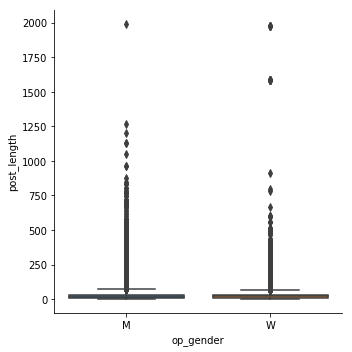

In [57]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=fb_wiki_sample)

print('average post length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].post_length.mean())

Interestingly, this is opposite from the Facebook Congress data. This time, the male posters have longer posts. It could also be specific to the sample - I'll have to make sure different samples are consistent to these results.

average response length when poster is male: 15.097215525554484
average response length when poster is female: 13.586386494252874


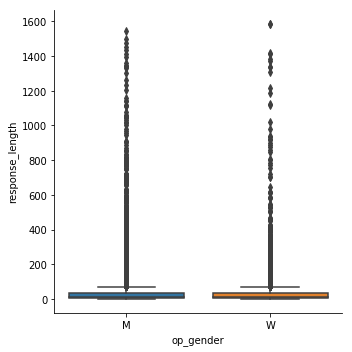

In [58]:
# look at response length again
sns.catplot(x='op_gender', y='response_length', kind='box', data=fb_congress_sample)

print('average response length when poster is male:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      fb_wiki_sample[fb_wiki_sample.op_gender == 'W'].response_length.mean())

Again, not a large difference in response length when responding to male vs. female posters.

In [59]:
# summary of post and response length
fb_wiki_sample.groupby('op_gender')[['post_length','response_length']].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             16592.0  38.073409  75.433776  0.0  6.0  17.0  33.0  1992.0   
W             33408.0  28.358058  54.891814  0.0  8.0  20.0  32.0  1978.0   

          response_length                                                     
                    count       mean        std  min  25%  50%   75%     max  
op_gender                                                                     
M                 16592.0  15.097216  35.229597  0.0  3.0  7.0  15.0  1523.0  
W                 33408.0  13.586386  33.074305  0.0  3.0  6.0  13.0  1502.0

In [60]:
# getting sentence lengths
post_sent_count = fb_wiki_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fb_wiki_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [61]:
# find average sentence length
post_avg_sent_length = fb_wiki_sample.post_length / post_sent_count
response_avg_sent_length = fb_wiki_sample.response_length / response_sent_count

In [62]:
# make new columns
fb_wiki_sample['post_avg_slen'] = post_avg_sent_length
fb_wiki_sample['response_avg_slen'] = response_avg_sent_length

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
215,20,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Christine,Feel free to share this with friends so they k...,David,"[Feel, free, to, share, this, with, friends, s...",[David],45,1,15.000000,1.0
422,45,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,John,Torrential rain is possible through Monday. Fe...,Kankakee call 1-800-GET-NOAH. 😳,"[Torrential, rain, is, possible, through, Mond...","[Kankakee, call, 1-800-GET-NOAH, ., 😳]",61,5,10.166667,2.5
634,66,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Mary,,Watching you live in car be safe,[],"[Watching, you, live, in, car, be, safe]",0,7,NaN,7.0
795,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cathy,"Hello it's Baseball time! Uh, but there's a ch...",Sure . . . why not?!?! lol,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Sure, ., ., ., why, not, ?, !, ?, !, lol]",69,11,9.857143,2.2
1101,113,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Kathleen,Big #temperature swing this week. #Cold start ...,Thanks. Now I know why I hurt so much.,"[Big, #, temperature, swing, this, week, ., #,...","[Thanks, ., Now, I, know, why, I, hurt, so, mu...",64,11,10.666667,5.5


In [63]:
# does gender of poster have an impact on sentence length?
fb_wiki_sample.groupby('op_gender')[['post_avg_slen','response_avg_slen']].describe()

post_avg_slen                                                   \
                  count       mean       std  min  25%    50%        75%   
op_gender                                                                  
M               14926.0  11.668747  8.593211  1.0  6.0  9.500  15.500000   
W               29596.0  10.947560  7.557418  1.0  7.0  9.875  13.666667   

                 response_avg_slen                                      \
             max             count      mean        std  min  25%  50%   
op_gender                                                                
M          225.5           16546.0  7.470924   8.559329  1.0  3.0  5.0   
W          514.0           33302.0  7.319048  11.723828  1.0  2.5  5.0   

                            
                75%    max  
op_gender                   
M          9.333333  344.0  
W          9.000000  666.0

This time, sentence length looks about equal in male vs. female posts, and well as in responses to male vs. female posters.

In [64]:
# average google k-band
# applying to df
fb_wiki_sample['post_avg_kband'] = fb_wiki_sample.post_tokens.map(get_avg_google_kband)
fb_wiki_sample['response_avg_kband'] = fb_wiki_sample.response_tokens.map(get_avg_google_kband)

fb_wiki_sample.head()

,post_id,post_type,op_id,op_name,op_category,op_gender,responder_id,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
215,20,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Christine,Feel free to share this with friends so they k...,David,"[Feel, free, to, share, this, with, friends, s...",[David],45,1,15.000000,1.0,2.000000,1.000000
422,45,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,John,Torrential rain is possible through Monday. Fe...,Kankakee call 1-800-GET-NOAH. 😳,"[Torrential, rain, is, possible, through, Mond...","[Kankakee, call, 1-800-GET-NOAH, ., 😳]",61,5,10.166667,2.5,2.638298,1.000000
634,66,video,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Mary,,Watching you live in car be safe,[],"[Watching, you, live, in, car, be, safe]",0,7,NaN,7.0,NaN,1.571429
795,82,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Cathy,"Hello it's Baseball time! Uh, but there's a ch...",Sure . . . why not?!?! lol,"[Hello, it, 's, Baseball, time, !, Uh, ,, but,...","[Sure, ., ., ., why, not, ?, !, ?, !, lol]",69,11,9.857143,2.2,2.245283,2.000000
1101,113,photo,11679984,Byron Miranda,Wikipedia_American_television_news_anchors,M,Kathleen,Big #temperature swing this week. #Cold start ...,Thanks. Now I know why I hurt so much.,"[Big, #, temperature, swing, this, week, ., #,...","[Thanks, ., Now, I, know, why, I, hurt, so, mu...",64,11,10.666667,5.5,2.568627,1.555556


In [65]:
fb_wiki_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                               \
                   count      mean       std  min       25%       50%   
op_gender                                                               
M                14640.0  2.781523  1.753286  1.0  1.841996  2.413793   
W                29107.0  2.620654  1.513273  1.0  1.727273  2.300000   

                          response_avg_kband                           \
                75%   max              count      mean       std  min   
op_gender                                                               
M          3.166667  20.0            14990.0  3.542100  3.357351  1.0   
W          3.055556  20.0            30324.0  3.834907  3.788666  1.0   

                                               
                25%       50%       75%   max  
op_gender                                      
M          1.517395  2.333333  4.000000  20.0  
W          1.545455  2.386364  4.333333  20.0

What does this tell us? Again - not much. The average k-band is about the same for all.

### Fitocracy linguistic analysis

In [66]:
# how big is this?
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [67]:
# again reduce to 50,000
fitocracy_sample = fitocracy_df.sample(50000)
fitocracy_sample.sort_index(inplace=True)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text
11,11,117,M,26833,M,I specifically put off deads until today to ke...,This is my favorite holiday of the year. I've ...
18,18,117,M,26833,M,Gorto! GORTO! It's late Gorto! getupgetupgetup...,*Yawn* Morning already?
24,24,117,M,26833,M,mfw the trainer/attendant I was making fun of ...,And I thought _I_ was an asshole. You make fun...
40,40,117,M,137055,M,My early morning workouts have left me ignoran...,"just introduce yourself and say ""would you be ..."
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.


So now we have both op gender and responder gender. I want to figure out how to put all of this in a box plot together for easier visualization... look into this. For now, moving on.

In [68]:
# tokenize...
fitocracy_sample['post_tokens'] = fitocracy_sample.post_text.map(nltk.word_tokenize)
fitocracy_sample['response_tokens'] = fitocracy_sample.response_text.map(nltk.word_tokenize)

# ... and find length
fitocracy_sample['post_length'] = fitocracy_sample.post_tokens.map(len)
fitocracy_sample['response_length'] = fitocracy_sample.response_tokens.map(len)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length
11,11,117,M,26833,M,I specifically put off deads until today to ke...,This is my favorite holiday of the year. I've ...,"[I, specifically, put, off, deads, until, toda...","[This, is, my, favorite, holiday, of, the, yea...",67,32
18,18,117,M,26833,M,Gorto! GORTO! It's late Gorto! getupgetupgetup...,*Yawn* Morning already?,"[Gorto, !, GORTO, !, It, 's, late, Gorto, !, g...","[*Yawn*, Morning, already, ?]",17,4
24,24,117,M,26833,M,mfw the trainer/attendant I was making fun of ...,And I thought _I_ was an asshole. You make fun...,"[mfw, the, trainer/attendant, I, was, making, ...","[And, I, thought, _I_, was, an, asshole, ., Yo...",45,36
40,40,117,M,137055,M,My early morning workouts have left me ignoran...,"just introduce yourself and say ""would you be ...","[My, early, morning, workouts, have, left, me,...","[just, introduce, yourself, and, say, ``, woul...",31,22
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.,"[Your, FCJ, post, :, I, came, 5-6, times.brb, ...","[me, too, .]",10,3


In [69]:
fitocracy_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                      \
                count       mean        std  min  25%   50%   75%     max   
op_gender                                                                   
M             27332.0  16.981158  17.904518  1.0  7.0  10.0  20.0   438.0   
W             22668.0  18.814629  28.120923  1.0  8.0  11.0  22.0  2150.0   

          response_length                                                     
                    count       mean        std  min  25%   50%   75%    max  
op_gender                                                                     
M                 27332.0  24.634641  29.217516  1.0  6.0  12.0  29.0  531.0  
W                 22668.0  27.538645  31.153393  1.0  6.0  13.0  35.0  631.0

In [70]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12430.0  16.445615  19.560985  1.0  5.0  10.0   
          W                 14902.0  31.465240  33.823217  1.0  6.0  14.0   
W         M                 11861.0  15.867802  18.563815  1.0  5.0  10.0   
          W                 10807.0  40.347738  36.660587  1.0  8.0  22.0   

                             75%    max  
op_gender responder_gender               
M         M                 20.0  531.0  
          W                 58.0  255.0  
W         M                 19.0  631.0  
          W                 86.0  300.0

A lot to analyze here. Let's break this up a little:

#### Post length

Posts by females seem to be a little longer than posts by males.

#### Response length

Overall, responses to female posters seem to be a little longer than responses to male posters. Let's break it down even further:
- Male poster/male responder has shorter responses than male poster/female responder.
- Female poster/male responder has shorter responses than female poster/female responder.

So do female responders always have longer responses than male responders, regardless of the original poster's gender? It seems like it from this quick analysis.

Given this information about post and response length by gender, it seems like (for Fitocracy, at least) female posters and responders generally have longer posts/responses than their male counterparts.

#### Gender x Gender
Male responders have about the same length response when responding to male vs. female posters, but female responders have longer responses when responding to female than when responding to male.

In [71]:
# getting sentence lengths
post_sent_count = fitocracy_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = fitocracy_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [72]:
# find average sentence length
post_avg_sent_length = fitocracy_sample.post_length / post_sent_count
response_avg_sent_length = fitocracy_sample.response_length / response_sent_count

In [73]:
# make new columns
fitocracy_sample['post_avg_slen'] = post_avg_sent_length
fitocracy_sample['response_avg_slen'] = response_avg_sent_length

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
11,11,117,M,26833,M,I specifically put off deads until today to ke...,This is my favorite holiday of the year. I've ...,"[I, specifically, put, off, deads, until, toda...","[This, is, my, favorite, holiday, of, the, yea...",67,32,16.75,10.666667
18,18,117,M,26833,M,Gorto! GORTO! It's late Gorto! getupgetupgetup...,*Yawn* Morning already?,"[Gorto, !, GORTO, !, It, 's, late, Gorto, !, g...","[*Yawn*, Morning, already, ?]",17,4,3.40,4.000000
24,24,117,M,26833,M,mfw the trainer/attendant I was making fun of ...,And I thought _I_ was an asshole. You make fun...,"[mfw, the, trainer/attendant, I, was, making, ...","[And, I, thought, _I_, was, an, asshole, ., Yo...",45,36,45.00,18.000000
40,40,117,M,137055,M,My early morning workouts have left me ignoran...,"just introduce yourself and say ""would you be ...","[My, early, morning, workouts, have, left, me,...","[just, introduce, yourself, and, say, ``, woul...",31,22,15.50,22.000000
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.,"[Your, FCJ, post, :, I, came, 5-6, times.brb, ...","[me, too, .]",10,3,10.00,3.000000


In [74]:
# summarize again
fitocracy_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                      \
                  count      mean        std  min       25%  50%        75%   
op_gender                                                                     
M               27332.0  9.220342   6.395343  1.0  5.333333  8.0  10.666667   
W               22668.0  9.377037  11.652085  1.0  5.500000  8.0  10.500000   

                  response_avg_slen                                           \
              max             count       mean       std  min  25%       50%   
op_gender                                                                      
M           179.0           27332.0   9.999041  8.560181  1.0  4.0  7.000000   
W          1075.0           22668.0  10.561456  9.312003  1.0  4.0  7.333333   

                             
                 75%    max  
op_gender                    
M          12.000000  107.0  
W          12.666667  107.0

In [75]:
fitocracy_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean        std  min  25%   50%  \
op_gender responder_gender                                                  
M         M                 12430.0   8.314858   6.468403  1.0  4.0   6.5   
          W                 14902.0  11.403846   9.755163  1.0  4.0   7.5   
W         M                 11861.0   7.858347   6.062616  1.0  4.0   6.0   
          W                 10807.0  13.528196  11.168251  1.0  5.0  10.0   

                              75%    max  
op_gender responder_gender                
M         M                 11.00  107.0  
          W                 14.75   92.0  
W         M                 10.00   77.0  
          W                 23.00  107.0

Analyzing sentence length by gender:

#### Post sentence length

Posts by females and males seem to have about the same average sentence length.

#### Response sentence length

Responses to females vs. males seem to have about the same average sentence length, but let's again break it down further:
- Male poster/male responder has shorter sentences in the response than male poster/female responder.
- Female poster/male responder has shorter sentences in the response than female poster/female responder.

Summing that up, it seems like female responders use longer sentences regardless of the original poster's gender.

#### Gender x Gender
Male responders have a little bit longer sentences when responding to a male than when responding to a female, and female responders have a little bit longer sentences when responding to a female than when responding to a male.

In [76]:
# computing average k-band
fitocracy_sample['post_avg_kband'] = fitocracy_sample.post_tokens.map(get_avg_google_kband)
fitocracy_sample['response_avg_kband'] = fitocracy_sample.response_tokens.map(get_avg_google_kband)

fitocracy_sample.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
11,11,117,M,26833,M,I specifically put off deads until today to ke...,This is my favorite holiday of the year. I've ...,"[I, specifically, put, off, deads, until, toda...","[This, is, my, favorite, holiday, of, the, yea...",67,32,16.75,10.666667,2.188679,2.400000
18,18,117,M,26833,M,Gorto! GORTO! It's late Gorto! getupgetupgetup...,*Yawn* Morning already?,"[Gorto, !, GORTO, !, It, 's, late, Gorto, !, g...","[*Yawn*, Morning, already, ?]",17,4,3.40,4.000000,4.000000,1.500000
24,24,117,M,26833,M,mfw the trainer/attendant I was making fun of ...,And I thought _I_ was an asshole. You make fun...,"[mfw, the, trainer/attendant, I, was, making, ...","[And, I, thought, _I_, was, an, asshole, ., Yo...",45,36,45.00,18.000000,2.000000,2.125000
40,40,117,M,137055,M,My early morning workouts have left me ignoran...,"just introduce yourself and say ""would you be ...","[My, early, morning, workouts, have, left, me,...","[just, introduce, yourself, and, say, ``, woul...",31,22,15.50,22.000000,2.280000,1.388889
43,43,117,M,81720,M,Your FCJ post: I came 5-6 times.brb changing p...,me too.,"[Your, FCJ, post, :, I, came, 5-6, times.brb, ...","[me, too, .]",10,3,10.00,3.000000,2.500000,1.000000


In [77]:
fitocracy_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                    \
                   count      mean       std  min  25%       50%       75%   
op_gender                                                                    
M                27108.0  2.399011  1.420430  1.0  1.4  2.071429  3.066667   
W                22527.0  2.294432  1.278938  1.0  1.4  2.000000  3.000000   

                response_avg_kband                                     \
            max              count      mean       std  min       25%   
op_gender                                                               
M          20.0            26408.0  2.346154  1.928773  1.0  1.333333   
W          18.0            21932.0  2.263014  1.908809  1.0  1.333333   

                                     
                50%       75%   max  
op_gender                            
M          1.739130  2.555556  20.0  
W          1.727273  2.400000  20.0

In [78]:
fitocracy_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M         M                 12021.0  2.522279  2.089539  1.0  1.333333   
          W                 14387.0  2.198993  1.770052  1.0  1.384615   
W         M                 11430.0  2.359342  2.045362  1.0  1.250000   
          W                 10502.0  2.158174  1.742163  1.0  1.500000   

                                 50%       75%   max  
op_gender responder_gender                            
M         M                 1.970588  2.857143  20.0  
          W                 1.650794  2.310345  20.0  
W         M                 1.782496  2.636364  20.0  
          W                 1.650794  2.150000  20.0

Again, average k-band is about the same for everything.

### Reddit linguistic analysis

In [79]:
# how big is this?
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453512 entries, 0 to 1453511
Data columns (total 10 columns):
post_id                     1453512 non-null int64
subreddit                   1453512 non-null object
op_id                       1453512 non-null object
op_gender                   1453512 non-null object
op_gender_visible           1453512 non-null bool
responder_id                1453512 non-null object
responder_gender            1453512 non-null object
responder_gender_visible    1453512 non-null object
post_text                   1453512 non-null object
response_text               1453512 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 112.3+ MB


In [80]:
# reduce to 50,000 again
reddit_sample = reddit_df.sample(50000)
reddit_sample.sort_index(inplace=True)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text
102,102,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,I dont think you have the mental capacity to e...,lel gud wun m8 10/10. Question still wasnt ans...
192,192,2007scape,Haineserino,M,False,worldsfastestsloth,,unknown_gender,what?,How did i clearly bot
216,216,2007scape,Haineserino,M,False,TBCMLwacki,,unknown_gender,their* only trying to help :),Thanks snookums! :*
330,330,2007scape,Haineserino,M,False,urasalmon,,unknown_gender,"The only reason thats bannable, is because its...",It is against the rules. The reason that its a...
362,362,2007scape,Zelotic,M,False,PM_ME_BIG_LOOTS,,unknown_gender,DH Pure is your serious account right?,No he probably has a max main he didnt bot.


In [81]:
# tokenize...
reddit_sample['post_tokens'] = reddit_sample.post_text.map(nltk.word_tokenize)
reddit_sample['response_tokens'] = reddit_sample.response_text.map(nltk.word_tokenize)

# ... and find length
reddit_sample['post_length'] = reddit_sample.post_tokens.map(len)
reddit_sample['response_length'] = reddit_sample.response_tokens.map(len)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length
102,102,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,I dont think you have the mental capacity to e...,lel gud wun m8 10/10. Question still wasnt ans...,"[I, dont, think, you, have, the, mental, capac...","[lel, gud, wun, m8, 10/10, ., Question, still,...",14,11
192,192,2007scape,Haineserino,M,False,worldsfastestsloth,,unknown_gender,what?,How did i clearly bot,"[what, ?]","[How, did, i, clearly, bot]",2,5
216,216,2007scape,Haineserino,M,False,TBCMLwacki,,unknown_gender,their* only trying to help :),Thanks snookums! :*,"[their*, only, trying, to, help, :, )]","[Thanks, snookums, !, :, *]",7,5
330,330,2007scape,Haineserino,M,False,urasalmon,,unknown_gender,"The only reason thats bannable, is because its...",It is against the rules. The reason that its a...,"[The, only, reason, thats, bannable, ,, is, be...","[It, is, against, the, rules, ., The, reason, ...",62,31
362,362,2007scape,Zelotic,M,False,PM_ME_BIG_LOOTS,,unknown_gender,DH Pure is your serious account right?,No he probably has a max main he didnt bot.,"[DH, Pure, is, your, serious, account, right, ?]","[No, he, probably, has, a, max, main, he, didn...",8,11


average post length when poster is male: 39.76507623454449
average post length when poster is female: 46.62989187637547


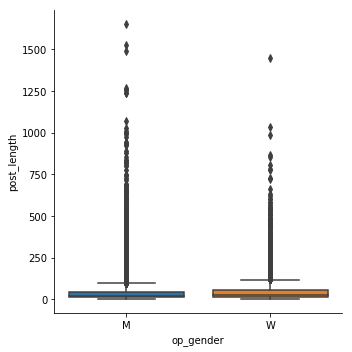

In [82]:
sns.catplot(x='op_gender', y='post_length', kind='box', data=reddit_sample)

print('average post length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].post_length.mean())
print('average post length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].post_length.mean())

So female posters typically have longer posts than male posters.

average response length when poster is male: 34.1949733242307
average response length when poster is female: 37.514591905080856


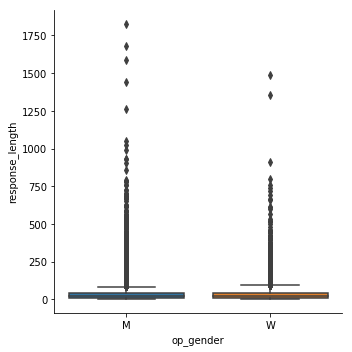

In [83]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=reddit_sample)

print('average response length when poster is male:',
      reddit_sample[reddit_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      reddit_sample[reddit_sample.op_gender == 'W'].response_length.mean())

Responses to female posters are a little bit longer than responses to male posters, but they are very close.

In [84]:
# summarize
reddit_sample.groupby('op_gender')['post_length', 'response_length'].describe()

post_length                                                       \
                count       mean        std  min   25%   50%   75%     max   
op_gender                                                                    
M             39549.0  39.765076  61.323793  1.0  11.0  22.0  45.0  1653.0   
W             10451.0  46.629892  64.631373  1.0  13.0  27.0  55.0  1450.0   

          response_length                                                       
                    count       mean        std  min   25%   50%   75%     max  
op_gender                                                                       
M                 39549.0  34.194973  52.858106  1.0   9.0  19.0  39.0  1828.0  
W                 10451.0  37.514592  56.194723  1.0  10.0  21.0  44.0  1490.0

In [85]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_length'].describe()

count       mean        std  min   25%   50%  \
op_gender responder_gender                                                   
M                           35961.0  33.890409  51.945446  1.0   9.0  19.0   
          M                  2830.0  35.735336  60.588830  1.0   9.0  20.0   
          W                   758.0  42.893140  63.075036  1.0  11.0  24.0   
W                            9442.0  37.110570  56.330546  1.0  10.0  20.0   
          M                   745.0  40.059060  53.813040  1.0  11.0  23.0   
          W                   264.0  44.784091  57.420889  2.0  14.0  29.5   

                             75%     max  
op_gender responder_gender                
M                           39.0  1828.0  
          M                 40.0  1440.0  
          W                 51.0   757.0  
W                           43.0  1490.0  
          M                 48.0   755.0  
          W                 54.0   429.0

For now, we don't care about when responder gender isn't visible. Let's summarize:

#### Post length

Female posters seem to typically have longer posts than male posters.

#### Response length

Responses to female posters seem to be a little longer than responses to male posters. Let's dive a little deeper:

- Male poster/male responder has shorter response length than male poster/male responder.
- female poster/male responder has shorter response length than female poster/female responder.

Again, it seems that female responders typically have longer responses than male responders, regardless of the original poster's gender.

#### Gender x Gender

Interestingly, male responders have longer responses when responding to females than when responding to males. Female responders have longer responses when responding to females than when responding to males.

In [86]:
# getting sentence lengths
post_sent_count = reddit_sample.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = reddit_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [87]:
# find average sentence length
post_avg_sent_length = reddit_sample.post_length / post_sent_count
response_avg_sent_length = reddit_sample.response_length / response_sent_count

In [88]:
# make new columns
reddit_sample['post_avg_slen'] = post_avg_sent_length
reddit_sample['response_avg_slen'] = response_avg_sent_length

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
102,102,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,I dont think you have the mental capacity to e...,lel gud wun m8 10/10. Question still wasnt ans...,"[I, dont, think, you, have, the, mental, capac...","[lel, gud, wun, m8, 10/10, ., Question, still,...",14,11,14.0,5.5
192,192,2007scape,Haineserino,M,False,worldsfastestsloth,,unknown_gender,what?,How did i clearly bot,"[what, ?]","[How, did, i, clearly, bot]",2,5,2.0,5.0
216,216,2007scape,Haineserino,M,False,TBCMLwacki,,unknown_gender,their* only trying to help :),Thanks snookums! :*,"[their*, only, trying, to, help, :, )]","[Thanks, snookums, !, :, *]",7,5,7.0,2.5
330,330,2007scape,Haineserino,M,False,urasalmon,,unknown_gender,"The only reason thats bannable, is because its...",It is against the rules. The reason that its a...,"[The, only, reason, thats, bannable, ,, is, be...","[It, is, against, the, rules, ., The, reason, ...",62,31,15.5,15.5
362,362,2007scape,Zelotic,M,False,PM_ME_BIG_LOOTS,,unknown_gender,DH Pure is your serious account right?,No he probably has a max main he didnt bot.,"[DH, Pure, is, your, serious, account, right, ?]","[No, he, probably, has, a, max, main, he, didn...",8,11,8.0,11.0


In [89]:
# what did we find?
reddit_sample.groupby('op_gender')['post_avg_slen', 'response_avg_slen'].describe()

post_avg_slen                                                  \
                  count       mean       std  min  25%        50%   75%   
op_gender                                                                 
M               39549.0  13.560251  8.725756  1.0  8.0  12.000000  17.5   
W               10451.0  13.975083  9.021342  1.0  8.0  12.666667  18.0   

                 response_avg_slen                                             \
             max             count       mean       std  min  25%   50%   75%   
op_gender                                                                       
M          333.0           39549.0  12.763385  8.762918  1.0  7.0  11.0  17.0   
W          228.0           10451.0  12.989639  8.993814  1.0  7.0  11.5  17.0   

                  
             max  
op_gender         
M          213.0  
W          226.0

In [90]:
reddit_sample.groupby(['op_gender', 'responder_gender'])['response_avg_slen'].describe()

count       mean       std  min       25%  \
op_gender responder_gender                                                
M                           35961.0  12.766307  8.857219  1.0  7.000000   
          M                  2830.0  12.655729  7.815448  1.0  7.000000   
          W                   758.0  13.026699  7.526536  1.0  7.000000   
W                            9442.0  12.943017  9.086032  1.0  7.000000   
          M                   745.0  13.345401  8.161618  1.0  7.250000   
          W                   264.0  13.653119  7.820564  2.0  7.916667   

                                  50%        75%    max  
op_gender responder_gender                               
M                           11.000000  17.000000  213.0  
          M                 11.000000  16.750000   72.5  
          W                 12.000000  17.490385   48.0  
W                           11.333333  17.000000  226.0  
          M                 12.000000  17.500000   56.5  
          W                 12.500000  17.500000   55.0

What can we figure out from this?

#### Post sentence length

The average sentence length for both female and male posters is about the same.

#### Response sentence length

The average response length responding to both female and male posters is about the same. Also, the gender of the responder doesn't seem to make a difference in average sentence length in any case.

In [91]:
# computing average k-band
reddit_sample['post_avg_kband'] = reddit_sample.post_tokens.map(get_avg_google_kband)
reddit_sample['response_avg_kband'] = reddit_sample.response_tokens.map(get_avg_google_kband)

reddit_sample.head()

,post_id,subreddit,op_id,op_gender,op_gender_visible,responder_id,responder_gender,responder_gender_visible,post_text,response_text,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen,post_avg_kband,response_avg_kband
102,102,2007scape,SlayerMaster,M,False,Rn95,,unknown_gender,I dont think you have the mental capacity to e...,lel gud wun m8 10/10. Question still wasnt ans...,"[I, dont, think, you, have, the, mental, capac...","[lel, gud, wun, m8, 10/10, ., Question, still,...",14,11,14.0,5.5,1.500000,2.666667
192,192,2007scape,Haineserino,M,False,worldsfastestsloth,,unknown_gender,what?,How did i clearly bot,"[what, ?]","[How, did, i, clearly, bot]",2,5,2.0,5.0,1.000000,3.400000
216,216,2007scape,Haineserino,M,False,TBCMLwacki,,unknown_gender,their* only trying to help :),Thanks snookums! :*,"[their*, only, trying, to, help, :, )]","[Thanks, snookums, !, :, *]",7,5,7.0,2.5,1.250000,1.000000
330,330,2007scape,Haineserino,M,False,urasalmon,,unknown_gender,"The only reason thats bannable, is because its...",It is against the rules. The reason that its a...,"[The, only, reason, thats, bannable, ,, is, be...","[It, is, against, the, rules, ., The, reason, ...",62,31,15.5,15.5,2.300000,1.321429
362,362,2007scape,Zelotic,M,False,PM_ME_BIG_LOOTS,,unknown_gender,DH Pure is your serious account right?,No he probably has a max main he didnt bot.,"[DH, Pure, is, your, serious, account, right, ?]","[No, he, probably, has, a, max, main, he, didn...",8,11,8.0,11.0,2.857143,3.300000


In [92]:
reddit_sample.groupby('op_gender')['post_avg_kband', 'response_avg_kband'].describe()

post_avg_kband                                                     \
                   count      mean       std  min   25%       50%       75%   
op_gender                                                                     
M                39064.0  2.518141  1.454694  1.0  1.75  2.230769  2.850187   
W                10342.0  2.437854  1.353057  1.0  1.75  2.187500  2.742328   

                response_avg_kband                                           \
            max              count      mean       std  min       25%   50%   
op_gender                                                                     
M          20.0            38922.0  2.533072  1.652421  1.0  1.692308  2.20   
W          20.0            10299.0  2.448213  1.517203  1.0  1.684211  2.15   

                           
                75%   max  
op_gender                  
M          2.841180  20.0  
W          2.734534  20.0

In [93]:
reddit_sample.groupby(['op_gender','responder_gender'])['response_avg_kband'].describe()

count      mean       std  min       25%  \
op_gender responder_gender                                               
M                           35375.0  2.537989  1.654517  1.0  1.695652   
          M                  2797.0  2.492226  1.584142  1.0  1.666667   
          W                   750.0  2.453488  1.794864  1.0  1.706335   
W                            9298.0  2.454927  1.532710  1.0  1.682927   
          M                   738.0  2.406095  1.454704  1.0  1.694231   
          W                   263.0  2.329025  1.069052  1.0  1.765050   

                                 50%       75%   max  
op_gender responder_gender                            
M                           2.200000  2.848485  20.0  
          M                 2.166667  2.809524  18.0  
          W                 2.118704  2.680093  20.0  
W                           2.153846  2.750000  20.0  
          M                 2.090326  2.690939  16.0  
          W                 2.188119  2.639610  12.0

Again, about the same.

### TED linguistic analysis

In [94]:
# how big is this?
ted_responses_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190347 entries, 0 to 190413
Data columns (total 5 columns):
post_id          190347 non-null int64
op_id            190347 non-null object
op_gender        190347 non-null object
responder_id     190347 non-null object
response_text    190347 non-null object
dtypes: int64(1), object(4)
memory usage: 8.7+ MB


In [95]:
# reduce again for consistency (though I think this would be possible to handle anyways)
ted_sample = ted_responses_df.sample(50000)
ted_sample.sort_index(inplace=True)

In [96]:
# tokenize...
ted_sample['response_tokens'] = ted_sample.response_text.map(nltk.word_tokenize)

# ... and find length
ted_sample['response_length'] = ted_sample.response_tokens.map(len)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66
17,17,Aimee Mullins,W,Dany,"Wow, You have such a remarkable perspective on...","[Wow, ,, You, have, such, a, remarkable, persp...",58
18,18,Aimee Mullins,W,shen,"I hardly imagine her life without legs, just l...","[I, hardly, imagine, her, life, without, legs,...",35
22,22,Aimee Mullins,W,Jodie,She is so beautiful and optimistic that I like...,"[She, is, so, beautiful, and, optimistic, that...",41
31,31,Aimee Mullins,W,Sr.,Beautiful witness of courage and trust in God!...,"[Beautiful, witness, of, courage, and, trust, ...",35


average response length when poster is male: 94.16583471991126
average response length when poster is female: 90.96646617780341


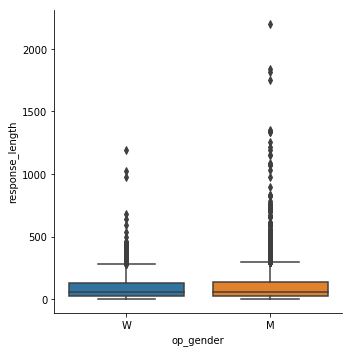

In [97]:
sns.catplot(x='op_gender', y='response_length', kind='box', data=ted_sample)

print('average response length when poster is male:',
      ted_sample[ted_sample.op_gender == 'M'].response_length.mean())
print('average response length when poster is female:',
      ted_sample[ted_sample.op_gender == 'W'].response_length.mean())

It seems responses are longer when the speaker is male than when they are female. Let's look at some more detail:

In [98]:
ted_sample.groupby('op_gender')['response_length'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37863.0,94.165835,98.382009,1.0,25.0,61.0,134.0,2201.0
W,12137.0,90.966466,91.255965,1.0,24.0,61.0,128.0,1190.0


In [99]:
# getting sentence lengths
response_sent_count = ted_sample.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

In [100]:
# find average sentence length
response_avg_sent_length = ted_sample.response_length / response_sent_count

In [101]:
# make new column
ted_sample['response_avg_slen'] = response_avg_sent_length

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66,13.200000
17,17,Aimee Mullins,W,Dany,"Wow, You have such a remarkable perspective on...","[Wow, ,, You, have, such, a, remarkable, persp...",58,19.333333
18,18,Aimee Mullins,W,shen,"I hardly imagine her life without legs, just l...","[I, hardly, imagine, her, life, without, legs,...",35,17.500000
22,22,Aimee Mullins,W,Jodie,She is so beautiful and optimistic that I like...,"[She, is, so, beautiful, and, optimistic, that...",41,13.666667
31,31,Aimee Mullins,W,Sr.,Beautiful witness of courage and trust in God!...,"[Beautiful, witness, of, courage, and, trust, ...",35,11.666667


In [102]:
# summarize
ted_sample.groupby('op_gender')['response_avg_slen'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37863.0,18.524399,12.839461,1.0,11.333333,16.941176,22.818182,420.0
W,12137.0,18.060992,12.380656,1.0,11.000000,16.500000,22.444444,293.0


Sentence length seems to be about the same whether they are responding to a male vs. a female speaker.

In [103]:
# add average google k-band
ted_sample['response_avg_kband'] = ted_sample.response_tokens.map(get_avg_google_kband)

ted_sample.head()

,post_id,op_id,op_gender,responder_id,response_text,response_tokens,response_length,response_avg_slen,response_avg_kband
16,16,Aimee Mullins,W,David,I'd never heard of Aimee Mullins when she spok...,"[I, 'd, never, heard, of, Aimee, Mullins, when...",66,13.200000,1.961538
17,17,Aimee Mullins,W,Dany,"Wow, You have such a remarkable perspective on...","[Wow, ,, You, have, such, a, remarkable, persp...",58,19.333333,2.122449
18,18,Aimee Mullins,W,shen,"I hardly imagine her life without legs, just l...","[I, hardly, imagine, her, life, without, legs,...",35,17.500000,2.357143
22,22,Aimee Mullins,W,Jodie,She is so beautiful and optimistic that I like...,"[She, is, so, beautiful, and, optimistic, that...",41,13.666667,2.108108
31,31,Aimee Mullins,W,Sr.,Beautiful witness of courage and trust in God!...,"[Beautiful, witness, of, courage, and, trust, ...",35,11.666667,2.322581


In [104]:
ted_sample.groupby('op_gender')['response_avg_kband'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37616.0,2.255256,0.958779,1.0,1.789474,2.106456,2.487179,20.0
W,12042.0,2.262398,0.960775,1.0,1.785484,2.105263,2.500000,16.5


And once again, the google k-band doesn't really differ between genders.

## Linguistic difference in gender

Now let's get to some specifics! What about the content of someone's speech/writing makes it more likely for them to be male vs. female? There are some basic differences that have been noted, that I found in *Women, Men, and Language: A sociolinguistic account of gender differences in language*, by Jennifer Coates. There are a lot of differences that Coates discusses regarding gendered speak. Some only apply to actual speech, which is irrelevant in this case, and some require more exchanges other than a simple post/response. I'm gathering a short list of differences that I think would be manageable to investigate for my project:

- Hedges: Hedges express uncertainty, and overall, women seem to use more hedges than men. Some examples of hedges include I think, I guess, I mean, kind of, I’m sure, you know, sort of, perhaps, etc.
- Compliments: It was found that women give and receive more compliments than men. In a study of 484 exchanges of compliments, 51% were woman to woman, 9% were man to man, 23.1% were man to woman, and 16.5% were woman to man. This could also be related to politeness.
- Questions: Typically, women use questions to "avoid the role of expert," found in phrases such as "do you?", "aren't there?", "isn't it?", "right?", etc. On the other hand, men use questions to seek new information or introduce a new topic.

Let's look at the presence of these in our file samples:

In [121]:
# list of hedges
hedges = ['i think', 'i guess', 'i mean', 'kind of', "i'm sure", 'you know', 'sort of', 'perhaps']

# create function
def find_hedges(text):
    text = text.lower()
    num = 0
    for hedge in hedges:
        num = num + text.count(hedge)
    return num

In [122]:
# test function
print(find_hedges('I guess!'))
print(find_hedges('I think you know that I sort of'))
print(find_hedges("Perhaps I'm SURE"))

1
3
2


In [137]:
# hedges in facebook congress (since we don't know responder gender, hedges for them don't really matter)
fb_congress_sample['post_hedges'] = fb_congress_sample.post_text.map(find_hedges)

fb_congress_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,37513.0,0.031456,0.219229,0.0,0.0,0.0,0.0,7.0
W,12487.0,0.049732,0.250279,0.0,0.0,0.0,0.0,4.0


In [143]:
# male posters with hedges
male_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'M') & (fb_congress_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_congress_sample[(fb_congress_sample.op_gender == 'W') & (fb_congress_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_congress_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(fb_female_hedges.index) / fb_congress_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.025937674939354356
percentage female posters with hedges: 0.07792103787939457


So there seems to be a little more hedges in posts from women!

In [144]:
# hedges in facebook wiki
fb_wiki_sample['post_hedges'] = fb_wiki_sample.post_text.map(find_hedges)

fb_wiki_sample.groupby('op_gender')['post_hedges'].describe()

,count,mean,std,min,25%,50%,75%,max
op_gender,,,,,,,,
M,16592.0,0.042249,0.246412,0.0,0.0,0.0,0.0,5.0
W,33408.0,0.018648,0.146948,0.0,0.0,0.0,0.0,3.0


In [145]:
# male posters with hedges
male_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'M') & (fb_wiki_sample.post_hedges != 0)]

# female posters with hedges
female_hedges = fb_wiki_sample[(fb_wiki_sample.op_gender == 'W') & (fb_wiki_sample.post_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges.index) / fb_wiki_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges.index) / fb_wiki_sample.op_gender.value_counts()['W'])

percentage male posters with hedges: 0.0349566055930569
percentage female posters with hedges: 0.017181513409961685


This time, male posters seem to have more hedges... Let's keep going.

In [149]:
# hedges in fitocracy
fitocracy_sample['post_hedges'] = fitocracy_sample.post_text.map(find_hedges)
fitocracy_sample['response_hedges'] = fitocracy_sample.response_text.map(find_hedges)

print(fitocracy_sample.groupby('op_gender')['post_hedges'].describe())
print(fitocracy_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          27332.0  0.024843  0.163445  0.0  0.0  0.0  0.0  3.0
W          22668.0  0.029601  0.182764  0.0  0.0  0.0  0.0  4.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
M                 24291.0  0.033263  0.188941  0.0  0.0  0.0  0.0  3.0
W                 25709.0  0.027111  0.173974  0.0  0.0  0.0  0.0  5.0


In [153]:
# male posters with hedges
male_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'M') & (fitocracy_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'M') & (fitocracy_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = fitocracy_sample[(fitocracy_sample.op_gender == 'W') & (fitocracy_sample.post_hedges != 0)]
# male responders with hedges
female_hedges_response = fitocracy_sample[(fitocracy_sample.responder_gender == 'W') & (fitocracy_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / fitocracy_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / fitocracy_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.023635299282891847
percentage female posters with hedges: 0.027616022586906652
percentage male responders with hedges: 0.03165781565188753
percentage female responders with hedges: 0.025555253024232758


This time, female posters have more hedges than male posters, but male responders have more hedges than female responders. Now onto Reddit:

In [154]:
# hedges in reddit
reddit_sample['post_hedges'] = reddit_sample.post_text.map(find_hedges)
reddit_sample['response_hedges'] = reddit_sample.response_text.map(find_hedges)

print(reddit_sample.groupby('op_gender')['post_hedges'].describe())
print(reddit_sample.groupby('responder_gender')['response_hedges'].describe())

             count      mean       std  min  25%  50%  75%  max
op_gender                                                      
M          39549.0  0.103113  0.362453  0.0  0.0  0.0  0.0  7.0
W          10451.0  0.135202  0.422111  0.0  0.0  0.0  0.0  6.0
                    count      mean       std  min  25%  50%  75%  max
responder_gender                                                      
                  45403.0  0.102680  0.356595  0.0  0.0  0.0  0.0  6.0
M                  3575.0  0.117203  0.397914  0.0  0.0  0.0  0.0  7.0
W                  1022.0  0.149706  0.415299  0.0  0.0  0.0  0.0  3.0


In [155]:
# male posters with hedges
male_hedges_post = reddit_sample[(reddit_sample.op_gender == 'M') & (reddit_sample.post_hedges != 0)]
# male responders with hedges
male_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'M') & (reddit_sample.response_hedges != 0)]

# female posters with hedges
female_hedges_post = reddit_sample[(reddit_sample.op_gender == 'W') & (reddit_sample.post_hedges != 0)]
# male responders with hedges
female_hedges_response = reddit_sample[(reddit_sample.responder_gender == 'W') & (reddit_sample.response_hedges != 0)]

print('percentage male posters with hedges:',
      len(male_hedges_post.index) / reddit_sample.op_gender.value_counts()['M'])

print('percentage female posters with hedges:',
      len(female_hedges_post.index) / reddit_sample.op_gender.value_counts()['W'])

print('percentage male responders with hedges:',
      len(male_hedges_response.index) / reddit_sample.responder_gender.value_counts()['M'])

print('percentage female responders with hedges:',
      len(female_hedges_response.index) / reddit_sample.responder_gender.value_counts()['W'])

percentage male posters with hedges: 0.08827024703532327
percentage female posters with hedges: 0.11137690173189169
percentage male responders with hedges: 0.09874125874125875
percentage female responders with hedges: 0.13013698630136986


This is what we like to see! In both categories (poster and responder), women use more hedges. We can't do our hedge analysis on our last file (TED) because the gender isn't listed for the responder.

## Machine Learning
Let's gather everything I want for machine learning! I want to focus on when we know the gender of the OP and the responder. Which files will work for this?

- Fitocracy: genders are present for all posters/responders
- Reddit: genders are present for all posters and only some responders

Looks like only two files. How big are these?

In [105]:
fitocracy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318535 entries, 0 to 318534
Data columns (total 7 columns):
post_id             318535 non-null int64
op_id               318535 non-null int64
op_gender           318535 non-null object
responder_id        318535 non-null int64
responder_gender    318535 non-null object
post_text           318535 non-null object
response_text       318535 non-null object
dtypes: int64(3), object(4)
memory usage: 19.4+ MB


In [106]:
# getting rid of when we don't know responder's gender
# want op gender to be visible so we know the responder is aware of what gender they are replying to
reddit_gender_visible = reddit_df[(reddit_df.responder_gender != '') & (reddit_df.op_gender_visible == True)]
reddit_gender_visible.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78231 entries, 51026 to 1314987
Data columns (total 10 columns):
post_id                     78231 non-null int64
subreddit                   78231 non-null object
op_id                       78231 non-null object
op_gender                   78231 non-null object
op_gender_visible           78231 non-null bool
responder_id                78231 non-null object
responder_gender            78231 non-null object
responder_gender_visible    78231 non-null object
post_text                   78231 non-null object
response_text               78231 non-null object
dtypes: bool(1), int64(1), object(8)
memory usage: 6.0+ MB


How should we merge these?

Both have columns for post_id, op_id, op_gender, responder_id, responder_gender, post_text, and response_text. Additionally, the Reddit data also has a column for subreddit, op_gender_visible, and responder_gender_visible. These probably don't matter for what I want to do with machine learning though - I'm more interested in the actual text. So let's delete these columns from reddit_df. Let's also add a 'source' column so we can tell where they came from when it's merged:

In [107]:
fitocracy_df['source'] = 'fitocracy'
fitocracy_df.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [108]:
reddit_gender_visible = reddit_gender_visible.drop(labels=['subreddit','op_gender_visible','responder_gender_visible'], axis=1)
reddit_gender_visible['source'] = 'reddit'
reddit_gender_visible.head()

,post_id,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
51026,51026,Uphoria,M,QuixoticChemist,W,I agree with this. most guys wont think twice ...,I think theyre are a few males in my lab this ...,reddit
51028,51028,Uphoria,M,MobileD,M,I honestly wouldnt. There are two things to c...,Basically this. I would recommend holding off...,reddit
51029,51029,satinbirdy,W,ninjarxa,M,Such a classic question! Im not a guy but Ive ...,whenever you make contact with another person ...,reddit
51030,51030,phukka,M,BroccoliFarts,W,"If its a guy that you might see often, a co-wo...",He is a coworker but I only work with him thre...,reddit
51031,51031,BroccoliFarts,W,phukka,M,He is a coworker but I only work with him thre...,"Also, watch how he interacts with his other co...",reddit


In [109]:
gender_visible_df = pd.concat([fitocracy_df, reddit_gender_visible], ignore_index=True)

# let's drop the post id column too and just use the index as post id
gender_visible_df.drop(labels=['post_id'], axis=1, inplace=True)

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy


In [110]:
gender_visible_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396766 entries, 0 to 396765
Data columns (total 7 columns):
op_id               396766 non-null object
op_gender           396766 non-null object
responder_id        396766 non-null object
responder_gender    396766 non-null object
post_text           396766 non-null object
response_text       396766 non-null object
source              396766 non-null object
dtypes: object(7)
memory usage: 21.2+ MB


In [111]:
# now let's do the same linguistic calculations to this df
# not including k-band, because when we did it above, there were no noticeable differences between genders

# tokenize...
gender_visible_df['post_tokens'] = gender_visible_df.post_text.map(nltk.word_tokenize)
gender_visible_df['response_tokens'] = gender_visible_df.response_text.map(nltk.word_tokenize)

# ... and find length
gender_visible_df['post_length'] = gender_visible_df.post_tokens.map(len)
gender_visible_df['response_length'] = gender_visible_df.response_tokens.map(len)

In [112]:
# getting sentence lengths
post_sent_count = gender_visible_df.post_text.map(lambda x: len(nltk.sent_tokenize(x)))
response_sent_count = gender_visible_df.response_text.map(lambda x: len(nltk.sent_tokenize(x)))

# find average sentence length
post_avg_sent_length = gender_visible_df.post_length / post_sent_count
response_avg_sent_length = gender_visible_df.response_length / response_sent_count

# make new columns
gender_visible_df['post_avg_slen'] = post_avg_sent_length
gender_visible_df['response_avg_slen'] = response_avg_sent_length

gender_visible_df.head()

,op_id,op_gender,responder_id,responder_gender,post_text,response_text,source,post_tokens,response_tokens,post_length,response_length,post_avg_slen,response_avg_slen
0,102,W,1196122,M,Thanks for the follow! I followed back :) I ...,One day at a time! =],fitocracy,"[Thanks, for, the, follow, !, I, followed, bac...","[One, day, at, a, time, !, =, ]]",25,8,12.5,4.000000
1,104,W,5867,W,I've decided I have this crazy goal of running...,Crazy is synonymous with awesome in this case.,fitocracy,"[I, 've, decided, I, have, this, crazy, goal, ...","[Crazy, is, synonymous, with, awesome, in, thi...",13,9,13.0,9.000000
2,104,W,1635,M,"Umm, yeah, so those are assisted pull-ups. Bef...",You can enter assisted pullups. Select pullups...,fitocracy,"[Umm, ,, yeah, ,, so, those, are, assisted, pu...","[You, can, enter, assisted, pullups, ., Select...",19,57,9.5,11.400000
3,117,M,8520,W,dam gurl lookin mad tone in dat pp holla bb,"Mirin 3% bodyfat? Yeah, you are.",fitocracy,"[dam, gurl, lookin, mad, tone, in, dat, pp, ho...","[Mirin, 3, %, bodyfat, ?, Yeah, ,, you, are, .]",10,10,10.0,5.000000
4,117,M,29126,M,What's up there bear mode?,"Hey! I just started a new job, so things are s...",fitocracy,"[What, 's, up, there, bear, mode, ?]","[Hey, !, I, just, started, a, new, job, ,, so,...",7,26,7.0,8.666667


Now that we've done all this work - let's pickle the dataframe! I'm going to create a new file for the machine learning and reopen the dataframe there.

In [113]:
import pickle

gender_visible_df.to_pickle("gender_visible_df.pkl")